To speed the execution procces, Colaboraty has an option to use GPU. This option is selected by default.

# How to study the Malaria dataset

In this notebook, we illustrate how FrImCla can be employed to classify images. We have to train the framework to make these classifications. In particular, we use the dataset provided for the National Library of Medicine (NLB) - from now on we will call this dataset, the Malaria dataset.

The Malaria dataset consist in 27558 images with equal instances of parasitized and uninfected cells. You can find more information about the dataset in the following link: 

https://ceb.nlm.nih.gov/repositories/malaria-datasets/

This dataset is used in the paper "Pre-trained convolutional neural networks as feature extractors toward improved malaria parasite detection in thin blood smear images". You can read the paper in the following link:

https://peerj.com/articles/4568/

We only will use a subset of this dataset to know the performance of FrImCla. The dataset contains 500 images of parasitized cells and 500 of uninfected cells. This subset can be downloaded by executing the following command.

In [0]:
!wget "https://drive.google.com/uc?id=1ElTc5K3CNVxYiMfdRc2HX1HL-UVud4UZ&export=download&authuser=0" -O malaria.zip
!unzip malaria.zip

--2019-03-19 09:15:25--  https://drive.google.com/uc?id=1ElTc5K3CNVxYiMfdRc2HX1HL-UVud4UZ&export=download&authuser=0
Resolving drive.google.com (drive.google.com)... 74.125.141.100, 74.125.141.138, 74.125.141.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1ElTc5K3CNVxYiMfdRc2HX1HL-UVud4UZ&export=download [following]
--2019-03-19 09:15:25--  https://drive.google.com/uc?id=1ElTc5K3CNVxYiMfdRc2HX1HL-UVud4UZ&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cbtiuj2c7a6ctqpj3itoeeijo2g0plla/1552982400000/05147614325801676241/*/1ElTc5K3CNVxYiMfdRc2HX1HL-UVud4UZ?e=download [following]
--2019-03-19 09:15:28--  https://doc-0g-3s-docs.googleusercontent.com/docs/securesc

In case that FrImCla is not installed in your system, the first task consist in installing using pip.

In [0]:
!pip install frimcla

We need some libraries to execute this framework and obtain the results. 

In [0]:
from frimcla.index_features import generateFeatures
from frimcla.StatisticalComparison import statisticalComparison
from frimcla.train import train
from frimcla.prediction import prediction

Using TensorFlow backend.


### Configuring the variables of the program

First of all, we have to indicate the variables that the program need such as the path of the dataset, the models you want to use,...

In [0]:
datasetPath = "./malaria"
outputPath = "./output"
# featureExtractors = [["inception", "False"]]
batchSize = 32 
verbose = False
# modelClassifiers = [ "MLP","SVM","KNN"] #You can use MLP, SVM, KNN , LogisticRegression or RandomForest
measure = "accuracy" #You can use accuracy, f1, auroc, precision or recall 
trainingSize = 1
nSteps=10


In the next section we have to select the feature extractors that we want to use (It is mandatory to **select at least one option**)

In [0]:
VGG16 = True #@param {type:"boolean"}
VGG19 = True #@param {type:"boolean"}
ResNet = True #@param {type:"boolean"}
Inception = True #@param {type:"boolean"}
GoogleNet = True #@param {type:"boolean"}
Overfeat = True #@param {type:"boolean"}
Xception = True #@param {type:"boolean"}
Densenet = True #@param {type:"boolean"}
LAB888 = True #@param {type:"boolean"}
LAB444 = True #@param {type:"boolean"}
HSV888 = True #@param {type:"boolean"}
HSV444 = True #@param {type:"boolean"}
Haralick = True #@param {type:"boolean"}
Hog = True #@param {type:"boolean"}
Haarhog = True #@param {type:"boolean"}

featureExtractors = []

if VGG19 :
  featureExtractors.append(["vgg19","False"])
if VGG16 :
  featureExtractors.append(["vgg16","False"])
if ResNet :
  featureExtractors.append(["resnet","False"])
if Inception :
  featureExtractors.append(["inception","False"])
if GoogleNet :
  featureExtractors.append(["googlenet"])
if Overfeat :
  featureExtractors.append(["overfeat","[-3]"])
if Xception :
  featureExtractors.append(["xception","False"])
if Densenet :
  featureExtractors.append(["densenet"])
if LAB888 :
  featureExtractors.append(["lab888"])
if LAB444 :
  featureExtractors.append(["lab444","4,4,4"])
if HSV888 :
  featureExtractors.append(["hsv888"])
if HSV444 :
  featureExtractors.append(["hsv444","4,4,4"])
if Haralick :
  featureExtractors.append(["haralick"])
if Hog :
  featureExtractors.append(["hog"])
if Haarhog :
  featureExtractors.append(["haarhog"])

Now we have to indicate the classifier models that we want to use (It is mandatory to **select at least one option**)

In [0]:
MLP = True #@param {type:"boolean"}
SVM = True #@param {type:"boolean"}
KNN = True #@param {type:"boolean"}
LogisticRegression = True #@param {type:"boolean"}
GradientBoost = True #@param {type:"boolean"}
RandomForest = True #@param {type:"boolean"}

modelClassifiers = []


if MLP :
  modelClassifiers.append("MLP")
if SVM :
  modelClassifiers.append("SVM")
if KNN :
  modelClassifiers.append("KNN")
if LogisticRegression :
  modelClassifiers.append("LogisticRegression")
if GradientBoost :
  modelClassifiers.append("GradientBoost")
if RandomForest :
  modelClassifiers.append("RandomForest")

### Generating the features

At this step we stored the features of each image of the dataset. These features depend on the model used at this moment because each model stores different features of the image. 

In [0]:
generateFeatures(outputPath, batchSize, datasetPath, featureExtractors, verbose)

[INFO] loading ['inception', 'False']...
[WARN] minimum init buffer not reached - 2019-03-19 09:32:44.871350
[INFO] creating datasets... - 2019-03-19 09:32:44.871633
[INFO] writing un-empty buffers... - 2019-03-19 09:32:44.872948
[INFO] writing `image_ids` buffer - 2019-03-19 09:32:44.873762
[INFO] writing `features` buffer - 2019-03-19 09:32:44.875844
[INFO] compacting datasets... - 2019-03-19 09:32:44.890217
[INFO] old size of `image_ids`: 1,000; new size: 1,000 - 2019-03-19 09:32:44.890484
[INFO] old size of `features`: 1,000; new size: 1,000 - 2019-03-19 09:32:44.890846


### Statistical analysis

Now with the features of all the images of each model we can perform a statistical analysis to know which of this models has the best performace.

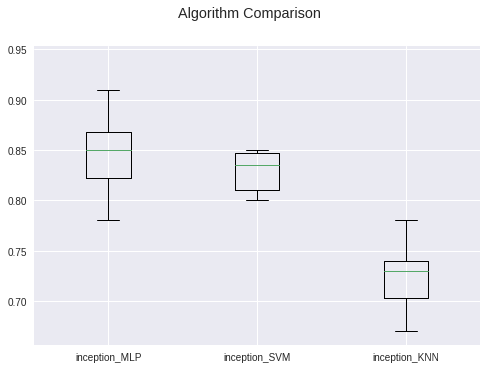

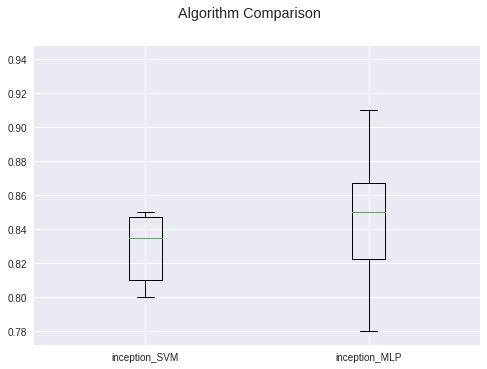

In [0]:
statisticalComparison(outputPath, datasetPath, featureExtractors, modelClassifiers, measure, nSteps, verbose)

### Train the model

The study gives us as result the best model and indicates if there are significant differences between this and the rest of the models. With this information, we can train the best model and return as a result of the framework to the user.

In [0]:
train(outputPath, datasetPath, trainingSize)

[INFO] gathering train/test splits...
[INFO] tuning hyperparameters...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

[INFO] best hyperparameters: {'activation': 'tanh', 'alpha': 0, 'learning_rate': 'constant', 'momentum': 0.95, 'solver': 'adam'}
[INFO] dumping classifier...
Do you want to generate a web app to classify the images with the best combination? y/n
y


### Predict the class of the images

Finally, we have the best model and we can use it to predict the class of our images. To do this we have to use the following command and we have to define the feature extractor and the classifier. The prediction will store in the predictionResults file.

In [0]:
image = "./malaria/Uninfected/C1_thinF_IMG_20150604_104942_cell_20.png"
featExt = ["inception", "False"]
classi = "MLP"
prediction(featExt, classi, image, outputPath, datasetPath)

[INFO] loading model...
[INFO] loading ['inception', 'False']...
[INFO] class predicted for the image Uninfected:C1_thinF_IMG_20150604_104942_cell_20.png: ['Uninfected']


In [0]:
!cat output/malaria/predictionResults.csv

classifiers  ConfModel.json  models  predictionResults.csv  results  webApp.zip
image_id, melanoma
image_id, /malaria
Uninfected:C1_thinF_IMG_20150604_104942_cell_20.png, 1
